<a href="https://colab.research.google.com/github/Frankcus/github-slideshow/blob/main/CIND820Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CIND 820 Project - What makes a Board Game Highly Rated?

BY: Francis Semenuk - 500185004

Supervisor: Ceni Babaoglu

In [54]:
import pandas as pd
from patsy import dmatrices
import numpy as np
#import os
import matplotlib.pyplot as plt
import statsmodels.discrete.discrete_model as sm
import copy as cp
#import io
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree, linear_model, svm, datasets, metrics
from sklearn.model_selection import train_test_split,GridSearchCV, KFold, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.decomposition import PCA
from IPython.display import Image
from typing import Tuple
import pydotplus
#import sys
import seaborn as sns
#sys.path
#sys.path.append("/usr/lib/jvm/java-11-openjdk-amd64/bin/")
#os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64/"

In [55]:
df = pd.read_csv("/content/drive/MyDrive/BoardgameswithExpansions.csv")
## view the first few rows of the data
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (68) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


row_names  game.id  game.type  \
0          1        1  boardgame   
1          2        2  boardgame   
2          3        3  boardgame   
3          4        4  boardgame   
4          5        5  boardgame   

                                 details.description  \
0  Die Macher is a game about seven sequential po...   
1  Dragonmaster is a trick-taking card game based...   
2  Part of the Knizia tile-laying trilogy, Samura...   
3  When you see the triangular box and the luxuri...   
4  In Acquire, each player strategically invests ...   

                                  details.image  details.maxplayers  \
0   //cf.geekdo-images.com/images/pic159509.jpg                 5.0   
1   //cf.geekdo-images.com/images/pic184174.jpg                 4.0   
2  //cf.geekdo-images.com/images/pic3211873.jpg                 4.0   
3   //cf.geekdo-images.com/images/pic285299.jpg                 4.0   
4   //cf.geekdo-images.com/images/pic342163.jpg                 6.0   

   details.maxplaytime  details.minage  details.minplayers  \
0                240.0            14.0                 3.0   
1                 30.0            12.0                 3.0   
2                 60.0            10.0                 2.0   
3                 60.0            12.0                 2.0   
4                 90.0            12.0                 3.0   

   details.minplaytime  ... stats.family.arcade.pos  \
0                240.0  ...                     NaN   
1                 30.0  ...                     NaN   
2                 30.0  ...                     NaN   
3                 60.0  ...                     NaN   
4                 90.0  ...                     NaN   

   stats.family.atarist.bayesaverage stats.family.atarist.pos  \
0                                NaN                      NaN   
1                                NaN                      NaN   
2                                NaN                      NaN   
3                                NaN                      NaN   
4                                NaN                      NaN   

   stats.family.commodore64.bayesaverage stats.family.commodore64.pos  \
0                                    NaN                          NaN   
1                                    NaN                          NaN   
2                                    NaN                          NaN   
3                                    NaN                          NaN   
4                                    NaN                          NaN   

  stats.subtype.rpgitem.bayesaverage stats.subtype.rpgitem.pos  \
0                                NaN                       NaN   
1                                NaN                       NaN   
2                                NaN                       NaN   
3                                NaN                       NaN   
4                                NaN                       NaN   

  stats.subtype.videogame.bayesaverage stats.subtype.videogame.pos expansions  
0                                  NaN                         NaN          0  
1                                  NaN                         NaN          0  
2                                  NaN                         NaN          0  
3                                  NaN                         NaN          0  
4                                  NaN                         NaN          0  

[5 rows x 82 columns]

In [56]:
df.describe()

row_names        game.id  details.maxplayers  details.maxplaytime  \
count  76688.000000   76688.000000        76685.000000         76685.000000   
mean   42479.366628   81220.433432            5.647467            49.104153   
std    25722.198312   68265.573055           57.767585           351.301987   
min        1.000000       1.000000            0.000000             0.000000   
25%    20242.750000   22008.750000            2.000000             5.000000   
50%    41129.500000   55239.500000            4.000000            30.000000   
75%    64029.250000  141893.500000            6.000000            60.000000   
max    90400.000000  226264.000000        11299.000000         60120.000000   

       details.minage  details.minplayers  details.minplaytime  \
count    76685.000000        76685.000000         76685.000000   
mean         6.805607            2.007994            43.596623   
std          4.921399            0.868485           334.887241   
min          0.000000            0.000000             0.000000   
25%          0.000000            2.000000             5.000000   
50%          8.000000            2.000000            25.000000   
75%         10.000000            2.000000            45.000000   
max         99.000000           50.000000         60120.000000   

       details.playingtime  details.yearpublished  attributes.total  ...  \
count         76685.000000           76685.000000      76688.000000  ...   
mean             49.104153            1789.260220          4.695024  ...   
std             351.301987             611.127654          1.168575  ...   
min               0.000000           -3500.000000          1.000000  ...   
25%               5.000000            1982.000000          4.000000  ...   
50%              30.000000            2003.000000          5.000000  ...   
75%              60.000000            2011.000000          5.000000  ...   
max           60120.000000            2019.000000         10.000000  ...   

       stats.family.arcade.pos  stats.family.atarist.bayesaverage  \
count                      1.0                            1.00000   
mean                     156.0                            6.08824   
std                        NaN                                NaN   
min                      156.0                            6.08824   
25%                      156.0                            6.08824   
50%                      156.0                            6.08824   
75%                      156.0                            6.08824   
max                      156.0                            6.08824   

       stats.family.atarist.pos  stats.family.commodore64.bayesaverage  \
count                       1.0                                1.00000   
mean                      102.0                                6.06726   
std                         NaN                                    NaN   
min                       102.0                                6.06726   
25%                       102.0                                6.06726   
50%                       102.0                                6.06726   
75%                       102.0                                6.06726   
max                       102.0                                6.06726   

       stats.family.commodore64.pos  stats.subtype.rpgitem.bayesaverage  \
count                           1.0                            2.000000   
mean                          159.0                            5.919690   
std                             NaN                            0.194794   
min                           159.0                            5.781950   
25%                           159.0                            5.850820   
50%                           159.0                            5.919690   
75%                           159.0                            5.988560   
max                           159.0                            6.057430   

       stats.subtype.rpgitem.pos  stats.subtype.video

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76688 entries, 0 to 76687
Data columns (total 82 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   row_names                                 76688 non-null  int64  
 1   game.id                                   76688 non-null  int64  
 2   game.type                                 76688 non-null  object 
 3   details.description                       76663 non-null  object 
 4   details.image                             70787 non-null  object 
 5   details.maxplayers                        76685 non-null  float64
 6   details.maxplaytime                       76685 non-null  float64
 7   details.minage                            76685 non-null  float64
 8   details.minplayers                        76685 non-null  float64
 9   details.minplaytime                       76685 non-null  float64
 10  details.name                      

In [58]:
dfLess = df.copy()
percent_missing = dfLess.isnull().sum()* 100 / len(dfLess)
missing_value_df = pd.DataFrame({'column_name': dfLess.columns,
                                 'percent_missing': percent_missing})
missing_value_df

column_name  \
row_names                                                        row_names   
game.id                                                            game.id   
game.type                                                        game.type   
details.description                                    details.description   
details.image                                                details.image   
...                                                                    ...   
stats.subtype.rpgitem.bayesaverage      stats.subtype.rpgitem.bayesaverage   
stats.subtype.rpgitem.pos                        stats.subtype.rpgitem.pos   
stats.subtype.videogame.bayesaverage  stats.subtype.videogame.bayesaverage   
stats.subtype.videogame.pos                    stats.subtype.videogame.pos   
expansions                                                      expansions   

                                      percent_missing  
row_names                                    0.000000  
game.id                                      0.000000  
game.type                                    0.000000  
details.description                          0.032600  
details.image                                7.694815  
...                                               ...  
stats.subtype.rpgitem.bayesaverage          99.997392  
stats.subtype.rpgitem.pos                   99.997392  
stats.subtype.videogame.bayesaverage        99.998696  
stats.subtype.videogame.pos                 99.998696  
expansions                                   0.000000  

[82 rows x 2 columns]

In [59]:
#removing columns with very high amount of null values

dfLess.drop(df.iloc[:,28:44], axis=1, inplace=True)
dfLess.drop(df.iloc[:,68:81], axis=1, inplace=True)
dfLess.drop(df.columns[[0,1,2,3,4,10,12,16,18,20,21,49,50]], axis=1, inplace=True)
dfLess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76688 entries, 0 to 76687
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   details.maxplayers               76685 non-null  float64
 1   details.maxplaytime              76685 non-null  float64
 2   details.minage                   76685 non-null  float64
 3   details.minplayers               76685 non-null  float64
 4   details.minplaytime              76685 non-null  float64
 5   details.playingtime              76685 non-null  float64
 6   details.yearpublished            76685 non-null  float64
 7   attributes.boardgameartist       27520 non-null  object 
 8   attributes.boardgamecategory     75297 non-null  object 
 9   attributes.boardgamedesigner     67101 non-null  object 
 10  attributes.boardgamefamily       39776 non-null  object 
 11  attributes.boardgamemechanic     62971 non-null  object 
 12  attributes.boardga

[Text(0.5, 0, 'details.maxplayers'),
 Text(1.5, 0, 'details.maxplaytime'),
 Text(2.5, 0, 'details.minage'),
 Text(3.5, 0, 'details.minplayers'),
 Text(4.5, 0, 'details.minplaytime'),
 Text(5.5, 0, 'details.playingtime'),
 Text(6.5, 0, 'details.yearpublished'),
 Text(7.5, 0, 'attributes.total'),
 Text(8.5, 0, 'stats.average'),
 Text(9.5, 0, 'stats.averageweight'),
 Text(10.5, 0, 'stats.bayesaverage'),
 Text(11.5, 0, 'stats.median'),
 Text(12.5, 0, 'stats.numcomments'),
 Text(13.5, 0, 'stats.numweights'),
 Text(14.5, 0, 'stats.owned'),
 Text(15.5, 0, 'stats.stddev'),
 Text(16.5, 0, 'stats.trading'),
 Text(17.5, 0, 'stats.usersrated'),
 Text(18.5, 0, 'stats.wanting'),
 Text(19.5, 0, 'stats.wishing'),
 Text(20.5, 0, 'polls.suggested_playerage'),
 Text(21.5, 0, 'expansions')]

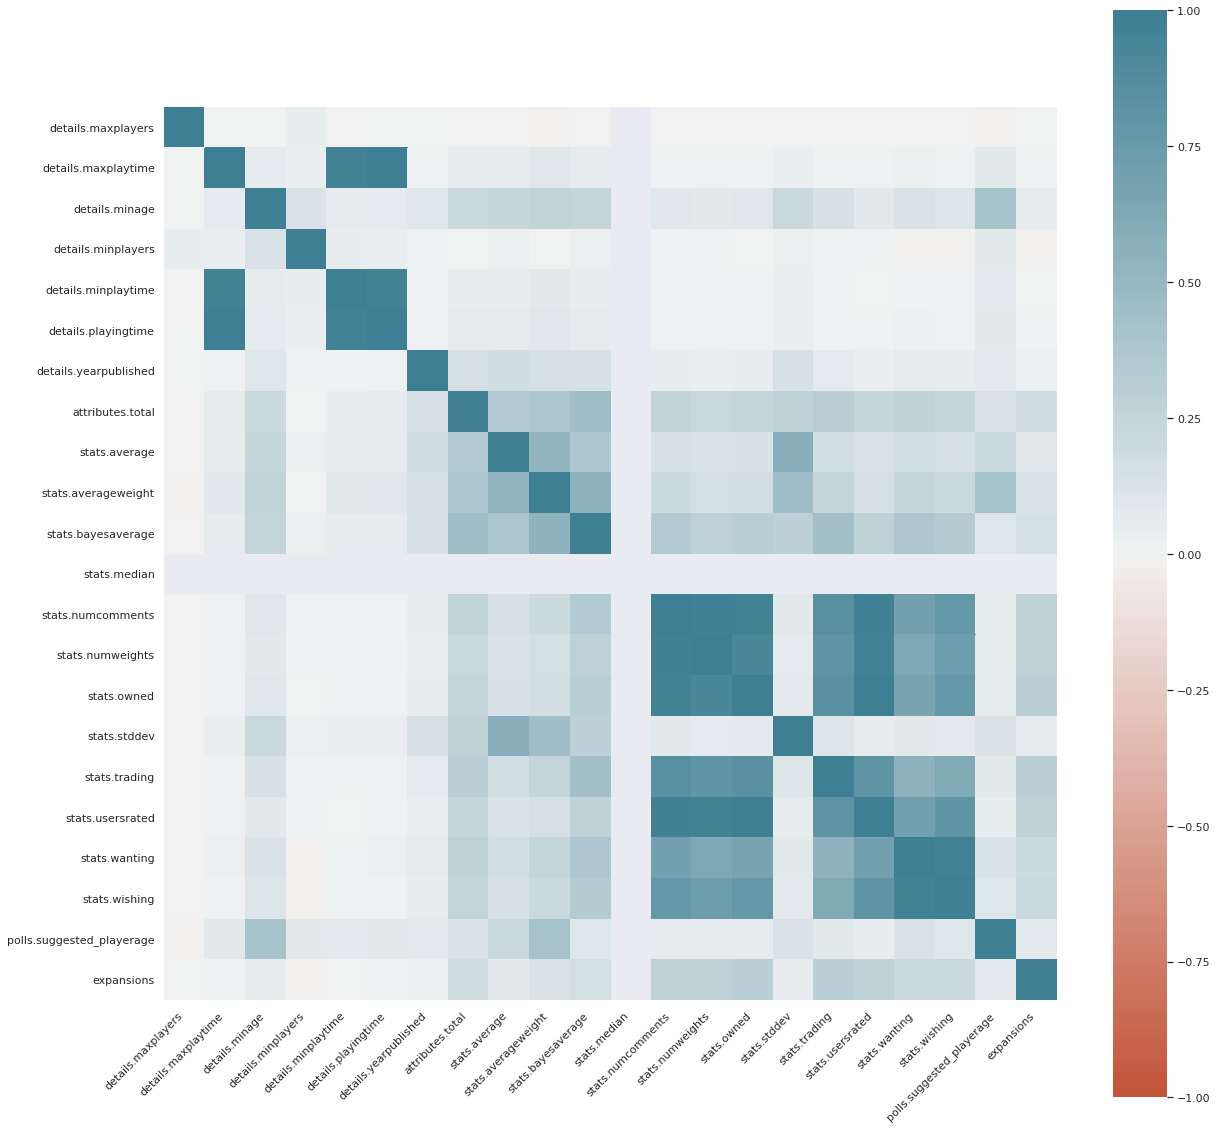

In [60]:
corr = dfLess.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20,220,n=200),
    square=True
)
sns.set(rc = {'figure.figsize':(20,20)})
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [61]:
corr

details.maxplayers  details.maxplaytime  \
details.maxplayers                   1.000000             0.000201   
details.maxplaytime                  0.000201             1.000000   
details.minage                       0.006134             0.064847   
details.minplayers                   0.046383             0.035251   
details.minplaytime                 -0.000014             0.960065   
details.playingtime                  0.000201             1.000000   
details.yearpublished                0.003441             0.013602   
attributes.total                    -0.006645             0.053461   
stats.average                       -0.003967             0.050103   
stats.averageweight                 -0.008523             0.092448   
stats.bayesaverage                  -0.001515             0.051253   
stats.median                              NaN                  NaN   
stats.numcomments                   -0.000921             0.015965   
stats.numweights                    -0.000889             0.015602   
stats.owned                         -0.000576             0.013565   
stats.stddev                        -0.002125             0.038675   
stats.trading                       -0.001330             0.018959   
stats.usersrated                    -0.000500             0.010192   
stats.wanting                       -0.002367             0.025937   
stats.wishing                       -0.001661             0.020725   
polls.suggested_playerage           -0.008103             0.083406   
expansions                           0.001507             0.011505   

                           details.minage  details.minplayers  \
details.maxplayers               0.006134            0.046383   
details.maxplaytime              0.064847            0.035251   
details.minage                   1.000000            0.123777   
details.minplayers               0.123777            1.000000   
details.minplaytime              0.055940            0.039925   
details.playingtime              0.064847            0.035251   
details.yearpublished            0.106978            0.009627   
attributes.total                 0.217612            0.001683   
stats.average                    0.234600            0.026461   
stats.averageweight              0.264194            0.001816   
stats.bayesaverage               0.255597            0.027893   
stats.median                          NaN                 NaN   
stats.numcomments                0.101113            0.009668   
stats.numweights                 0.082873            0.008537   
stats.owned                      0.095534            0.006974   
stats.stddev                     0.215058            0.029729   
stats.trading                    0.137912            0.015910   
stats.usersrated                 0.082705            0.008604   
stats.wanting                    0.126037           -0.011745   
stats.wishing                    0.113428           -0.009826   
polls.suggested_playerage        0.406037            0.085333   
expansions                       0.059585           -0.009478   

                           details.minplaytime  details.playingtime  \
details.maxplayers                   -0.000014             0.000201   
details.maxplaytime                   0.960065             1.000000   
details.minage                        0.055940             0.064847   
details.minplayers                    0.039925             0.035251   
details.minplaytime                   1.000000             0.960065   
details.playingtime                   0.960065             1.000000   
details.yearpublished                 0.012304             0.013602   
attributes.total                      0.045124             0.053461   
stats.average                         0.043955             0.050103   
stats.averageweight                   0.083003             0.092448   
stats.bayesaverage                    0.046131             0.051253   
stats.median                               NaN                  NaN 

Several of the columns are found to be highly correlated (>0.8) and will be removed from the model since the feature will be well represented by the remaining feature.

In [62]:
#remove highly correlated columns
dfLess.drop(['details.maxplaytime', 'stats.numweights', 'stats.owned', 'stats.wishing', 'stats.numcomments', 'details.minplaytime'], axis=1, inplace=True)
dfLess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76688 entries, 0 to 76687
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   details.maxplayers               76685 non-null  float64
 1   details.minage                   76685 non-null  float64
 2   details.minplayers               76685 non-null  float64
 3   details.playingtime              76685 non-null  float64
 4   details.yearpublished            76685 non-null  float64
 5   attributes.boardgameartist       27520 non-null  object 
 6   attributes.boardgamecategory     75297 non-null  object 
 7   attributes.boardgamedesigner     67101 non-null  object 
 8   attributes.boardgamefamily       39776 non-null  object 
 9   attributes.boardgamemechanic     62971 non-null  object 
 10  attributes.boardgamepublisher    76593 non-null  object 
 11  attributes.total                 76688 non-null  int64  
 12  stats.average     

In [63]:
# investigate columns with many groups

li = [5,6,7,8,9,10,20,21,22,23,24,25,26,27,28,29,30,31,32]

for i in li:
  l =dfLess.iloc[:,i].unique()

  print(i, dfLess.columns[i], len(l))

5 attributes.boardgameartist 12528
6 attributes.boardgamecategory 14383
7 attributes.boardgamedesigner 21215
8 attributes.boardgamefamily 10233
9 attributes.boardgamemechanic 9011
10 attributes.boardgamepublisher 23387
20 polls.language_dependence 6
21 polls.suggested_numplayers.1 4
22 polls.suggested_numplayers.10 4
23 polls.suggested_numplayers.2 4
24 polls.suggested_numplayers.3 4
25 polls.suggested_numplayers.4 4
26 polls.suggested_numplayers.5 4
27 polls.suggested_numplayers.6 4
28 polls.suggested_numplayers.7 4
29 polls.suggested_numplayers.8 4
30 polls.suggested_numplayers.9 4
31 polls.suggested_numplayers.Over 4
32 polls.suggested_playerage 13


Columns with many groupings (greater than 13 groups in this case) will be dropped as the information gained from these columns will be limited.

In [64]:
dfLess.drop(dfLess.columns[[5,6, 7, 8, 9, 10, 15]], axis=1, inplace=True)
dfLess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76688 entries, 0 to 76687
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   details.maxplayers               76685 non-null  float64
 1   details.minage                   76685 non-null  float64
 2   details.minplayers               76685 non-null  float64
 3   details.playingtime              76685 non-null  float64
 4   details.yearpublished            76685 non-null  float64
 5   attributes.total                 76688 non-null  int64  
 6   stats.average                    76688 non-null  float64
 7   stats.averageweight              76688 non-null  float64
 8   stats.bayesaverage               76688 non-null  float64
 9   stats.stddev                     76688 non-null  float64
 10  stats.trading                    76688 non-null  int64  
 11  stats.usersrated                 76688 non-null  int64  
 12  stats.wanting     

In [65]:
#column cleaning - moving items that don't make sense

dfLess.loc[dfLess['details.minplayers'] >20, 'details.minplayers'] =20
dfLess.loc[dfLess['details.maxplayers'] >50, 'details.maxplayers'] =50


#set rating categories
dfLess.loc[dfLess['stats.average'] <5, 'stats.average'] = 0
dfLess.loc[dfLess['stats.average'] >=7, 'stats.average'] = 2
dfLess.loc[(dfLess['stats.average'] >=5) & (dfLess['stats.average']<7), 'stats.average'] = 1



In [66]:
#changing 0s for columns that do not make sense to allow for imputation
NAcols = ['details.yearpublished', 'details.playingtime','details.minage', 'details.maxplayers', 'details.minplayers']
for i in NAcols:
  dfLess[i] = dfLess[i].replace(0, np.nan)


In [67]:
NaNcols = ['polls.suggested_numplayers.10','polls.suggested_numplayers.1', 'polls.suggested_numplayers.2','polls.suggested_numplayers.3', 'polls.suggested_numplayers.4', 'polls.suggested_numplayers.5', 'polls.suggested_numplayers.6', 'polls.suggested_numplayers.7', 'polls.suggested_numplayers.8','polls.suggested_numplayers.9','polls.suggested_numplayers.Over',]

for x in NaNcols:
  dfLess[x] = dfLess[x].fillna('NotRecommended')

dfLess['polls.suggested_playerage'] = dfLess['polls.suggested_playerage'].fillna(dfLess['polls.suggested_playerage'].mean())
dfLess['polls.language_dependence'] = dfLess['polls.language_dependence'].fillna('Not Rated')

In [68]:
for col in dfLess.columns:
  if dfLess[col].isna().sum()!=0:
    print(col,dfLess[col].isna().sum())

details.maxplayers 5272
details.minage 19826
details.minplayers 1783
details.playingtime 18311
details.yearpublished 7900


In [69]:
for col in dfLess.columns:
  if dfLess[col].isna().sum()!=0:
    dfLess[col] = dfLess[col].fillna(dfLess[col].mean())
    print(col,dfLess[col].isna().sum())

details.maxplayers 0
details.minage 0
details.minplayers 0
details.playingtime 0
details.yearpublished 0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac910c9f10>,
      dtype=object)

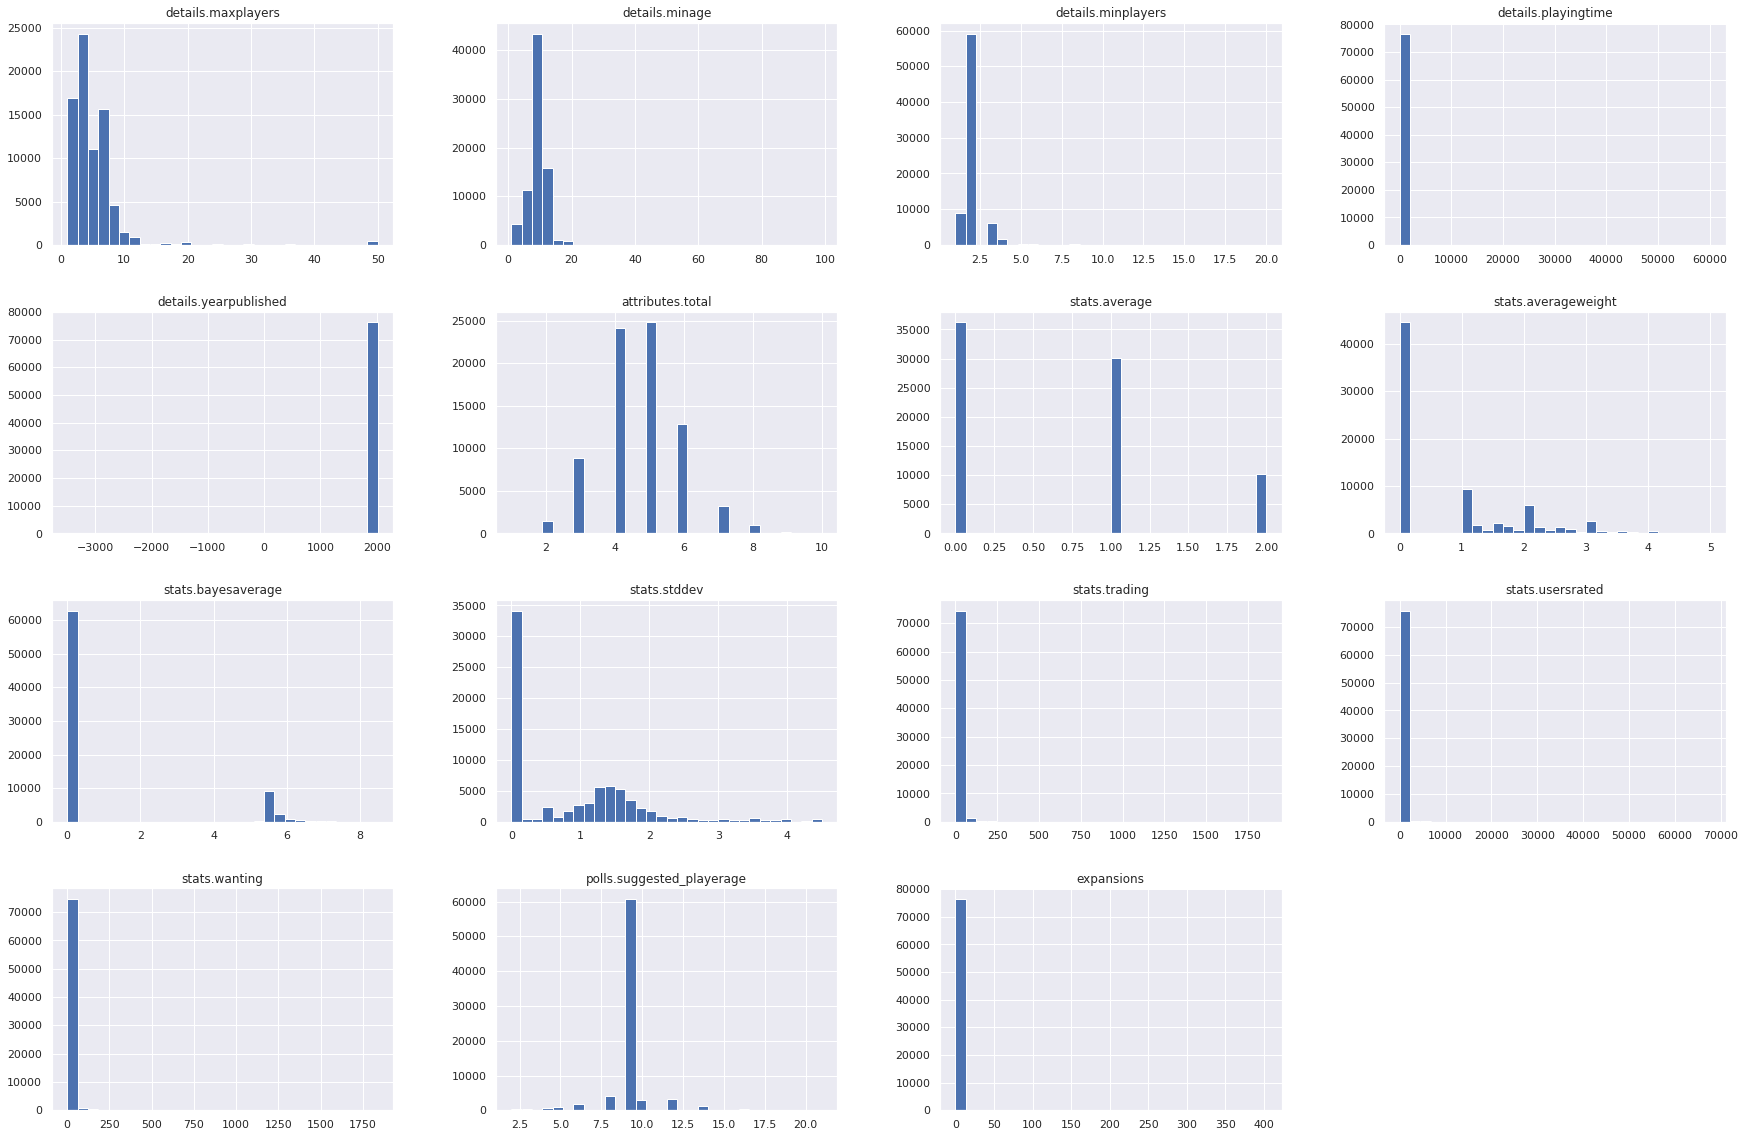

In [70]:
dfLess.hist(bins=30, figsize=(30,20))

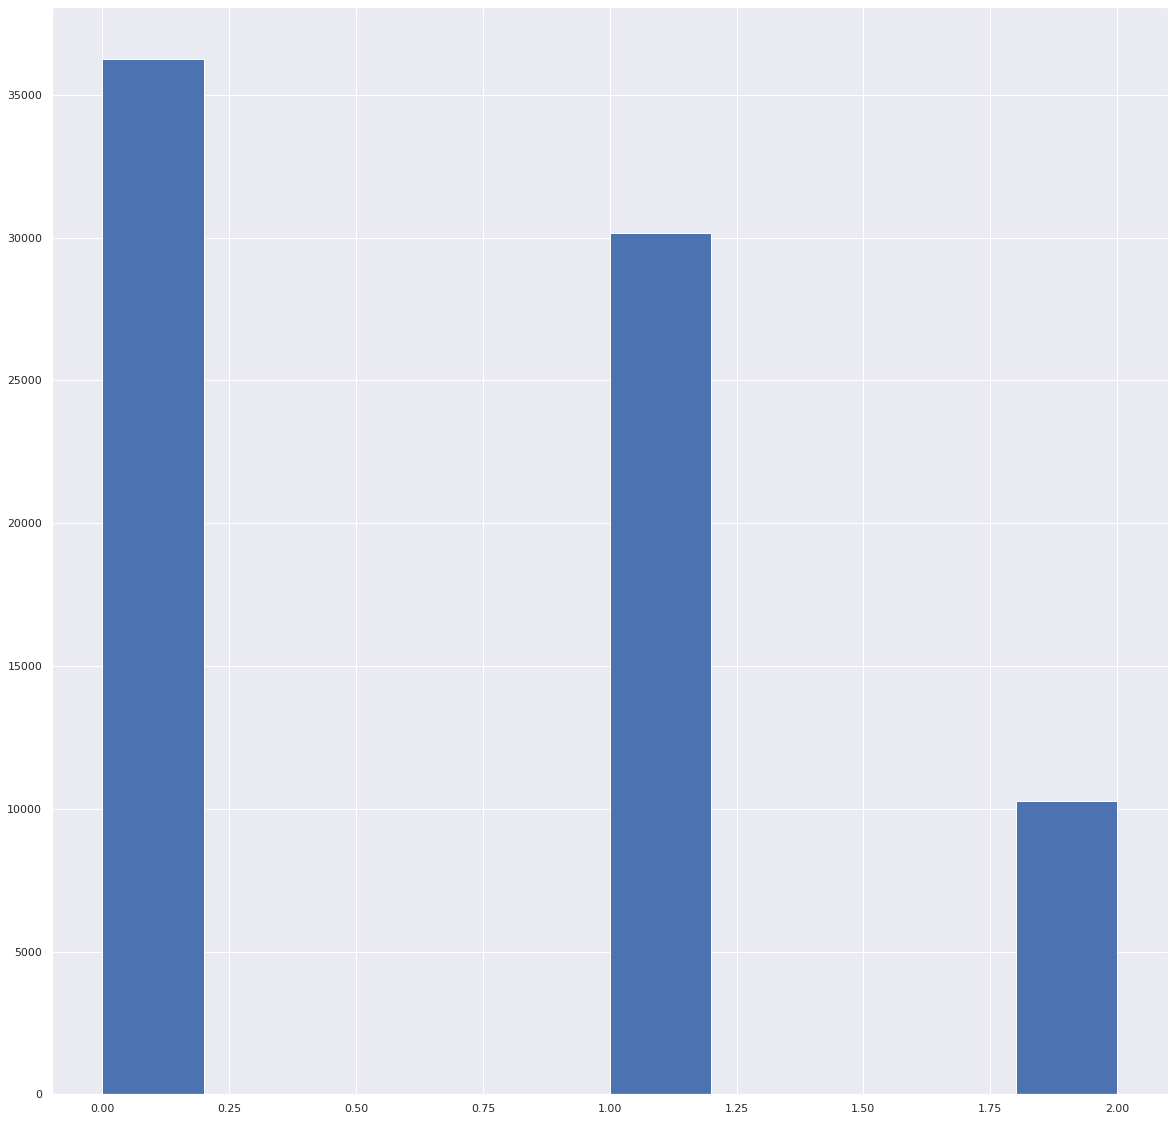

In [71]:
dfLess['stats.average'].hist()

The above graph displays an asymmetrical distribution of the data - where highly rated games account for less than a third of each of the other two groups by comparison.

In [72]:
dfLess['stats.average'] = dfLess['stats.average'].astype(str)
dfLess.loc[dfLess['stats.average'] =='0.0', 'stats.average'] = 'low'
dfLess.loc[dfLess['stats.average'] =='2.0', 'stats.average'] = 'high'
dfLess.loc[dfLess['stats.average'] =='1.0', 'stats.average'] = 'med'

In [73]:
#one-hot encoding of the remaining categorical variables
ohe = pd.get_dummies(dfLess, columns = ['polls.language_dependence', 'polls.suggested_numplayers.1',
                                        'polls.suggested_numplayers.10', 'polls.suggested_numplayers.2', 'polls.suggested_numplayers.3', 'polls.suggested_numplayers.4',
                                         'polls.suggested_numplayers.5', 'polls.suggested_numplayers.6', 'polls.suggested_numplayers.7', 'polls.suggested_numplayers.8',
                                         'polls.suggested_numplayers.9', 'polls.suggested_numplayers.Over',])


The data will be explored via classification modeling using a stratified classificaiton approach, and component reduction through principal component analysis as well as a regular 10-fold model.

In [74]:
#Data preparation for decision tree modelling
X = ohe.drop('stats.average', axis=1)
y = ohe[['stats.average']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)

In [75]:
kFolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=100)
cnt =1
for train, test in kFolds.split(X,y):
  print(f'Fold:{cnt} successfully split')
  cnt+=1

Fold:1 successfully split
Fold:2 successfully split
Fold:3 successfully split
Fold:4 successfully split
Fold:5 successfully split
Fold:6 successfully split
Fold:7 successfully split
Fold:8 successfully split
Fold:9 successfully split
Fold:10 successfully split


Checking max depth tuning to see what the optimal tree size would look like to create a template.

In [76]:
#depth tuning
max_depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for val in max_depth:
    score = cross_val_score(tree.DecisionTreeClassifier(max_depth= val, random_state= 100), X, y, cv= kFolds, scoring="accuracy")
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')

Average score(1): 0.693
Average score(2): 0.693
Average score(3): 0.701
Average score(4): 0.708
Average score(5): 0.711
Average score(6): 0.727
Average score(7): 0.735
Average score(8): 0.743
Average score(9): 0.746
Average score(10): 0.752
Average score(11): 0.756
Average score(12): 0.756
Average score(13): 0.757
Average score(14): 0.757
Average score(15): 0.756


In [77]:
cvs = cross_val_score(tree.DecisionTreeClassifier(criterion="gini", max_depth=12, random_state= 100), X, y, cv= kFolds, scoring="accuracy")
print(f'Fold scores: {cvs}')
print(f'Average score: {cvs.mean()}')

Fold scores: [0.76450645 0.75746512 0.75733472 0.74755509 0.75433564 0.76046421
 0.75498761 0.7659408  0.74908712 0.75117371]
Average score: 0.7562850470833773


Using a stratified 10-fold decision tree classificaiton model - this yielded an overall score of ~0.756. The folding of the model ensures the variance of model is reduced from the different iteration samples used.

In [78]:
#Decision tree view determined by tuning
clf = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=12)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=12, random_state=100)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.340408 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.340408 to fit



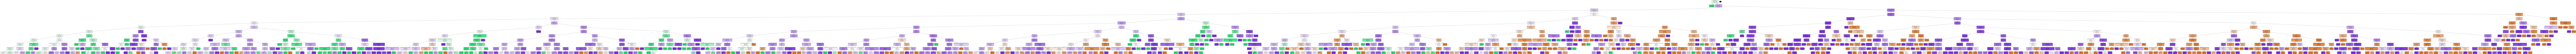

In [79]:
features = ohe.columns
features = features.drop('stats.average')
clsN = y_train.iloc[::,-1].unique()
clsN = clsN[::-1]
graphDF = export_graphviz(clf,feature_names = features, class_names = clsN ,rounded = True,  filled = True)
# Draw graph
graph= pydotplus.graph_from_dot_data(graphDF)
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())

In [80]:
py_pred = clf.predict(X_test)
clf.score(X_test,y_test)

0.7523797105228843

For a decision tree model taken using a single train-test (70/30) at the optimal tree depth of 12 - the results yielded a Model score of ~0.75, meaning that it was able to correctly classify a data row 3 out of 4 times! A simplified tree is displayed below.

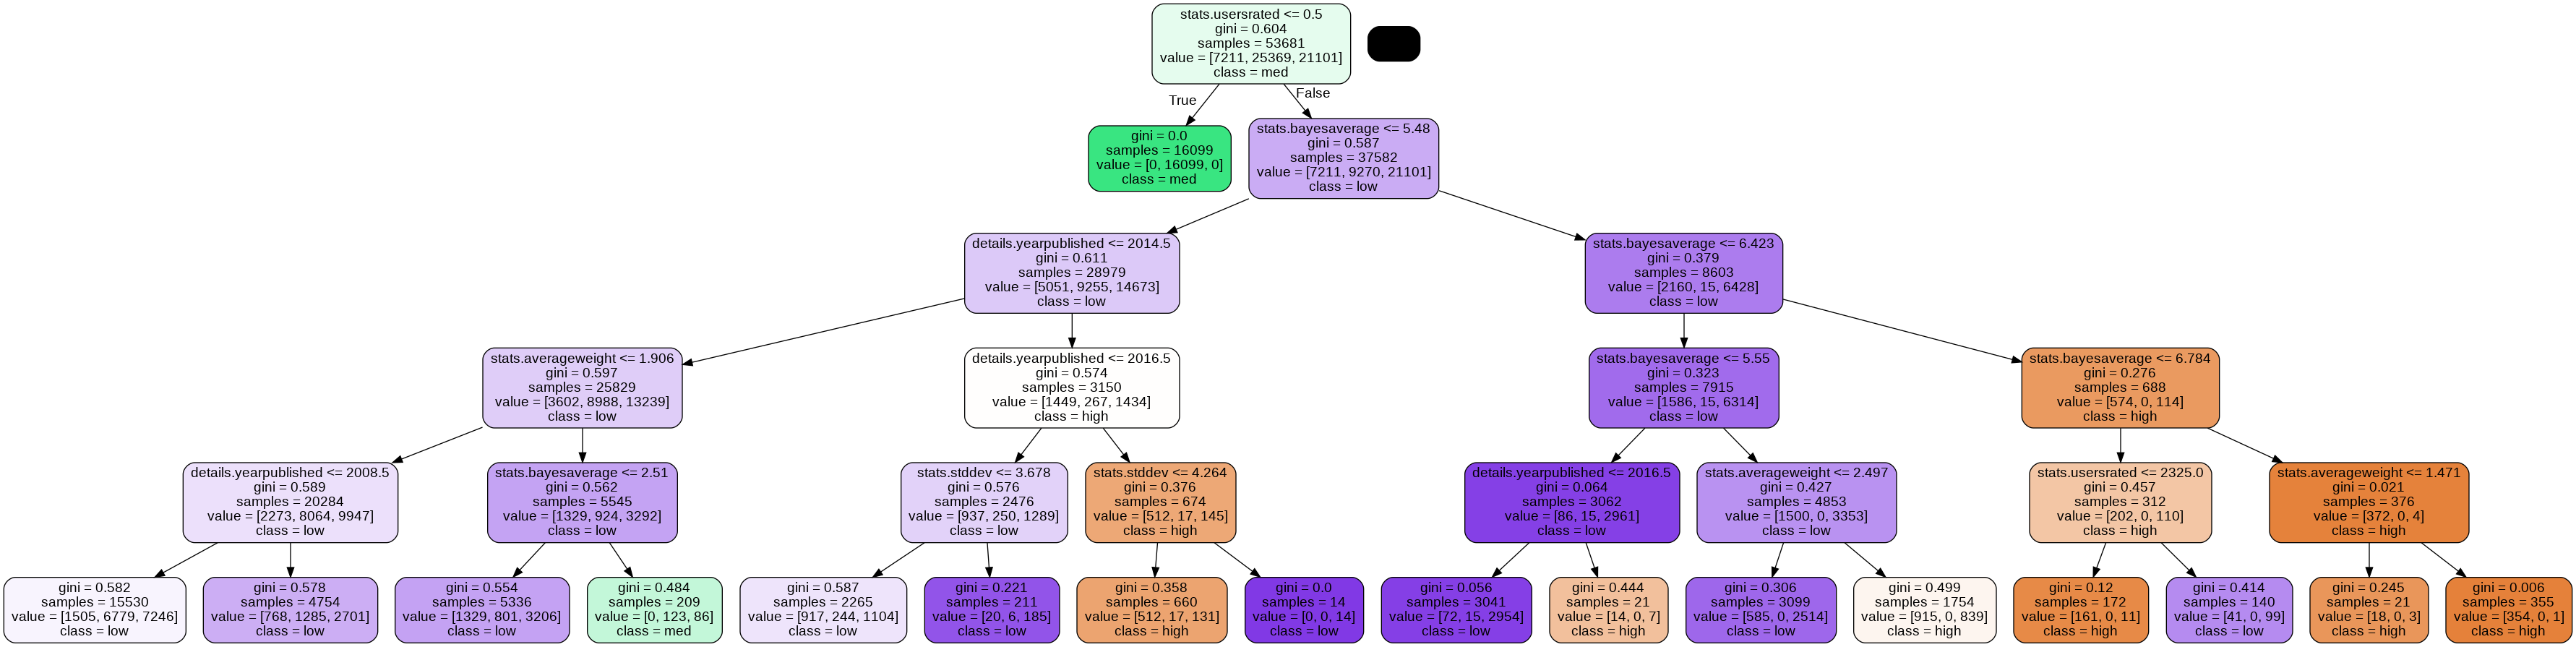

In [81]:
clf = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=5)#), min_samples_leaf = 5)
clf.fit(X_train, y_train)
graphDF = export_graphviz(clf,feature_names = features, class_names = clsN ,rounded = True,  filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(graphDF)
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())

Next I'll explore to see if using Principle component Analysis for feature reduction, if this will yield better results.

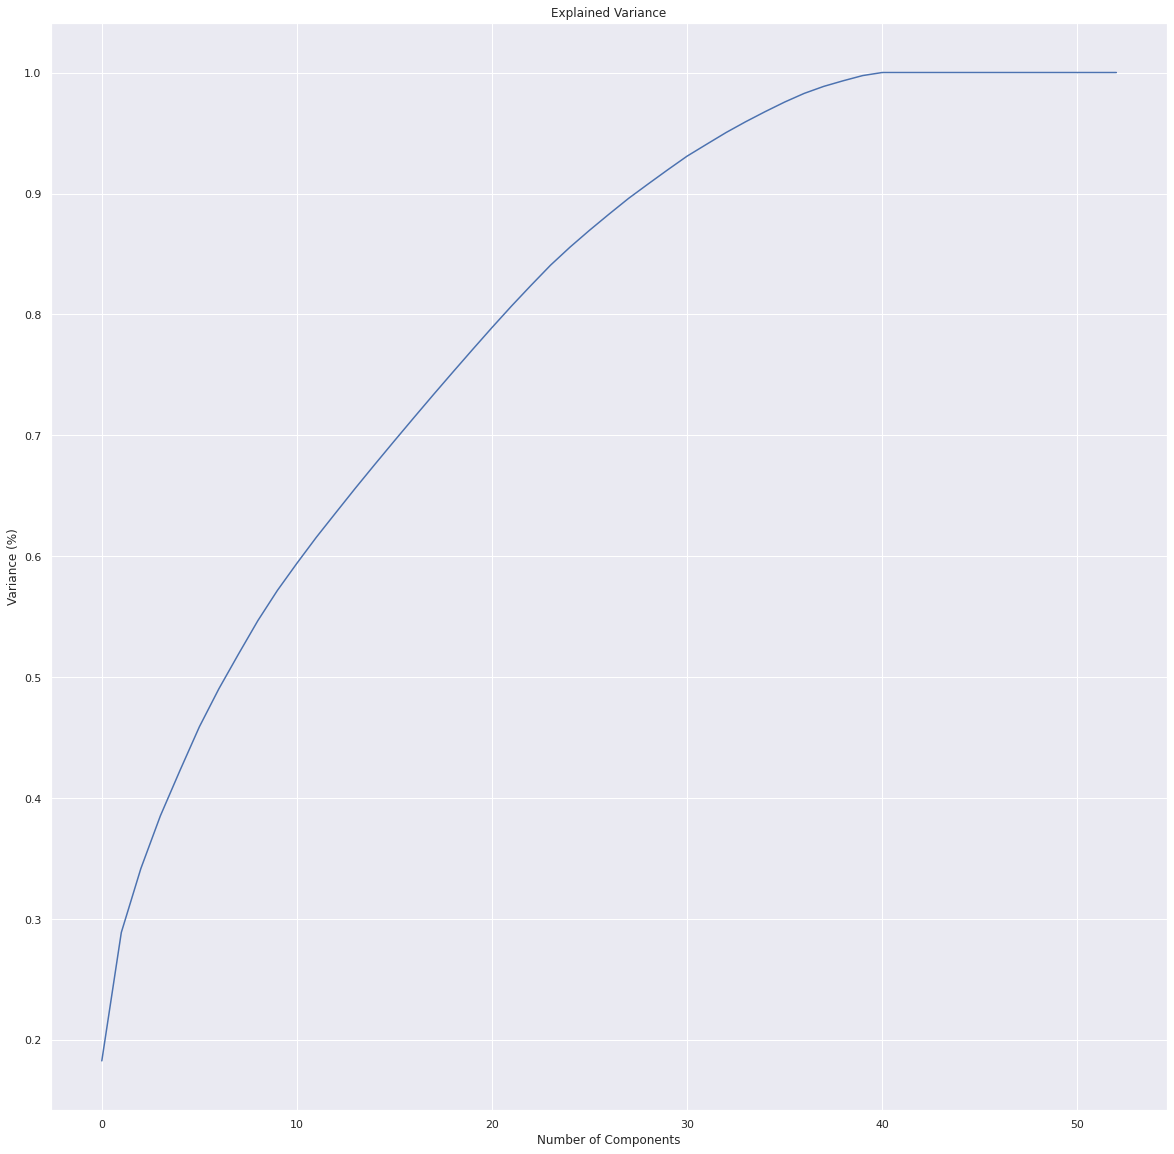

In [82]:
#Attempt feature reduction via PCA
tansformX = StandardScaler().fit_transform(X)
pca=PCA()
x_train,x_test,y_train,y_test = train_test_split(tansformX,y,test_size = 0.30, random_state= 100)
principalComponents = pca.fit_transform(tansformX)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

The graph of the Variance shows about 95% of the variance of the data can be explained by about 31 of the columns.

In [83]:
principal = PCA(n_components=31)
new_data = principal.fit_transform(tansformX)
j = []
for i in range(1,32):
  s = str('PC-'+str(i))
  j.append(s)
pca = pd.DataFrame(new_data,columns=j)
pca

PC-1      PC-2      PC-3       PC-4      PC-5      PC-6      PC-7  \
0       6.004505 -3.929580  0.946890   8.438855 -1.808738  1.760019  0.456501   
1       3.641615 -3.187910 -0.515126   1.696523  0.753273  0.393796  0.336526   
2       7.246894 -7.292955  2.556275  12.453320  2.300025 -0.909594  2.830145   
3       4.236470 -4.232743 -0.034574  -0.184406  2.601574 -0.491229  0.601720   
4      11.859029 -7.480321 -0.599125  20.331732 -2.226362  0.662437  2.612939   
...          ...       ...       ...        ...       ...       ...       ...   
76683  -1.795229  0.861668 -0.439421   0.038975 -0.048288 -0.061289  0.053381   
76684  -1.373287  0.625731 -0.081193   0.494648 -0.331801  0.238877  0.009563   
76685  -1.718096  0.536397 -0.839764  -0.412544  1.238327 -0.679596  0.489863   
76686  -1.373784  0.503676  0.090438   0.449322 -0.448383  0.168805 -0.164370   
76687  -1.459497  0.776488 -0.236713   0.435442 -0.303352  0.221838  0.037187   

           PC-8      PC-9     PC-10  ...     PC-22     PC-23     PC-24  \
0     -0.083662 -2.392553 -1.864590  ...  3.156790  0.030447 -5.168999   
1      2.183438 -0.038467 -0.144420  ... -1.611004 -0.157011  0.210448   
2     -4.415913  0.706921 -0.364225  ...  1.858637 -0.017593 -5.689172   
3      2.160447  0.538370  0.477874  ...  0.066152 -0.349117 -1.332071   
4     -5.826980  3.263103  3.415741  ... -0.244484 -1.362636 -6.179915   
...         ...       ...       ...  ...       ...       ...       ...   
76683 -0.412405  0.432143 -0.051786  ... -0.029079 -0.443221 -0.168251   
76684  0.558945  0.048140  0.128715  ... -0.116004 -0.178585 -0.209661   
76685 -2.041613 -0.036945 -0.260506  ...  0.222524  0.114867  0.536057   
76686  0.481173  0.180955 -0.005050  ... -0.113037 -0.018143 -0.367688   
76687  0.535775  0.180976  0.126865  ... -0.212987 -0.375192 -0.266862   

          PC-25     PC-26     PC-27     PC-28     PC-29     PC-30     PC-31  
0      0.685092  0.906728 -0.515531 -0.823022  3.316016  1.175553 -0.069722  
1     -0.563230 -0.859468 -1.440116  0.106279 -0.123695  0.136241  2.129922  
2     -0.760535  2.048760  0.639148  0.105958  1.216403  0.365386 -1.218853  
3      1.679884 -0.246634  0.131588 -1.157431  2.680625  0.454198 -1.146642  
4     -1.056261  2.008293  1.723554  1.714361  0.163249 -0.989203  1.166507  
...         ...       ...       ...       ...       ...       ...       ...  
76683  0.308473  0.087592  0.366043  0.409569  0.154813  0.208373  0.166898  
76684  0.921389 -0.669846 -1.248609 -0.125212 -0.881510 -0.307749 -0.128328  
76685 -0.872320 -0.113103 -0.465777  1.050744 -1.100605 -0.126360  0.554696  
76686  1.245455 -0.410237 -0.694398 -0.732016 -1.308213  0.229676  0.189360  
76687  0.829902 -0.402697 -0.683175  0.035841 -0.656506 -0.141585 -0.058854  

[76688 rows x 31 columns]

In [84]:
x_train,x_test,y_train,y_test = train_test_split(pca, y, test_size = 0.30, random_state= 100)
clf = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=12)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)                                              

0.6677967575085844

Exploring with PCA resulted in an overall reduction in performance of the model, dropping to ~0.668. In this case PCA would not be worthwile using for feature reduction, possible due in part because of many of the columns being generated from earlier splits using the one hot encoding.

In [85]:
#k fold decision tree confusion matrix initialization
def cross_val_predict(model, kfold : KFold, X : np.array, y : np.array) -> Tuple[np.array, np.array, np.array]:

    model_ = cp.deepcopy(model)
    
    no_classes = len(np.unique(y))
    
    actual_classes = np.empty([0], dtype=int)
    predicted_classes = np.empty([0], dtype=int)
    predicted_proba = np.empty([0, no_classes]) 

    for train_ndx, test_ndx in kfold.split(X):

        train_X, train_y, test_X, test_y = X[train_ndx], y[train_ndx], X[test_ndx], y[test_ndx]

        actual_classes = np.append(actual_classes, test_y)

        model_.fit(train_X, train_y) #cross val score here?
        predicted_classes = np.append(predicted_classes, model_.predict(test_X))

        try:
            predicted_proba = np.append(predicted_proba, model_.predict_proba(test_X), axis=0)
        except:
            predicted_proba = np.append(predicted_proba, np.zeros((len(test_X), no_classes), dtype=float), axis=0)

    return actual_classes, predicted_classes, predicted_proba

In [86]:
#Plotting k-fold decision tree results on confusion matrix
def plot_confusion_matrix(actual_classes : np.array, predicted_classes : np.array, sorted_labels : list):

    matrix = confusion_matrix(actual_classes, predicted_classes, labels=sorted_labels)
    
    plt.figure(figsize=(12.8,6))
    sns.heatmap(matrix, annot=True, xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="Blues", fmt="g")
    plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('KFold Decision Classifier Confusion Matrix')

    plt.show()
    return matrix

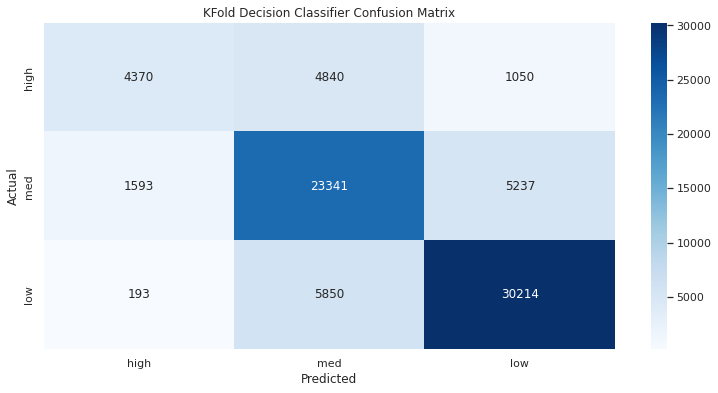

In [87]:
kfold = KFold(n_splits=10, random_state=100, shuffle=True)
actual_classes, predicted_classes, _ = cross_val_predict(DecisionTreeClassifier(max_depth=12), kfold, X.to_numpy(), y.to_numpy())
cfm = plot_confusion_matrix(actual_classes, predicted_classes, ['high', 'med', 'low'])


In [88]:
acc = (cfm[0,0]+cfm[1,1]+cfm[2,2])/cfm.sum()*100

recHigh = cfm[0,0]/(cfm[0,0:3].sum())*100
recMed = cfm[1,1]/cfm[1,0:3].sum()*100
recLow = cfm[2,2]/(cfm[2,0:3].sum())*100
presHigh = cfm[0,0]/(cfm[0:3,0].sum())*100
presMed = cfm[1,1]/(cfm[0:3,1].sum())*100
presLow = cfm[2,2]/(cfm[0:3,2].sum())*100
fScoreH = 2*recHigh*presHigh/(recHigh+presHigh)
fScoreM = 2*recMed*presMed/(recMed+presMed)
fScoreL = 2*recLow*presLow/(recLow+presLow)

wfScore = (cfm[0,0:3].sum()*fScoreH+cfm[1,0:3].sum()*fScoreM+cfm[2,0:3].sum()*fScoreL) /(cfm.sum())
print(f'Accuracy: {acc}')
print(f'Precision High: {presHigh}')
print(f'Precision Medium: {presMed}')
print(f'Precision Low: {presLow}')
print(f'Weighted f-score: {wfScore/100}')

Accuracy: 75.53332985604006
Precision High: 70.98765432098766
Precision Medium: 68.58746437072082
Precision Low: 82.77581436125038
Weighted f-score: 0.7499589247514432


While the overall model for the kFold decision tree classifier had a very good accuracy of 75%, the overall Precision also was high for each category (70.7, 68.5, and 82.8 for High, Medium, and Low respectively). An overall weighted f-score of 0.75 also indicates a very good fit for this model. It should be noted, however that the high group was incorretly classified as medium approximately half of the time it would seem that the model is better at identifying those board games which would be rated at Low or higher. Looking at the individual features from the decision tree - the most important features are the stats.bayesaverage and then the year of publication. 